In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../resources/womenReps.csv')
df.head()

,Congress,Years,Women total,Republican,% of women (Rep),% of party (Rep),Democratic,% of women (Dem),% of party (Dem)
0,65th,1917–1919,1,1,100%,0.5%,0,0%,0%
1,66th,1919–1921,0,0,0%,0%,0,0%,0%
2,67th,1921–1923,3,3,100%,0.3%,0,0%,0%
3,68th,1923–1925,1,1,100%,0.4%,0,0%,0%
4,69th,1925–1927,3,2,66.7%,0.4%,1,33.3%,0.5%


In [21]:
df['StartYear'] = df['Years'].apply(lambda x: int(x[:4]))

In [14]:
df['Years'].unique()

array(['1917–1919', '1919–1921', '1921–1923', '1923–1925', '1925–1927',
       '1927–1929', '1929–1931', '1931–1933', '1933–1935', '1935–1937',
       '1937–1939', '1939–1941', '1941–1943', '1943–1945', '1945–1947',
       '1947–1949', '1949–1951', '1951–1953', '1953–1955', '1955–1957',
       '1957–1959', '1959–1961', '1961–1963', '1963–1965', '1965–1967',
       '1967–1969', '1969–1971', '1971–1973', '1973–1975', '1975–1977',
       '1977–1979', '1979–1981', '1981–1983', '1983–1985', '1985–1987',
       '1987–1989', '1989–1991', '1991–1993', '1993–1995', '1995–1997',
       '1997–1999', '1999–2001', '2001–2003', '2003–2005', '2005–2007',
       '2007–2009', '2009–2011', '2011–2013', '2013–2015', '2015–2017',
       '2017–2019'], dtype=object)

Since 1917, the average number of women reps toal and in both parties

In [27]:
num = df[['Women total', 'Republican', 'Democratic']].mean()
num

Women total    26.627451
Republican      8.823529
Democratic     17.803922
dtype: float64

From 1917 to 1999, the average number of women reps total and in both parties

In [28]:
num19 = df[['Women total', 'Republican', 'Democratic']][df['StartYear'] < 2000].mean()
num19

Women total    16.119048
Republican      6.214286
Democratic      9.904762
dtype: float64

In the 21st century, the average number of women reps total and in both parties

In [29]:
num20 = df[['Women total', 'Republican', 'Democratic']][df['StartYear'] >= 2000].mean()
num20

Women total    75.666667
Republican     21.000000
Democratic     54.666667
dtype: float64

Share of average reps, Republican 20th century

In [35]:
num19[1] / num19[0] * 100

38.55243722304284

Share of average reps, Democrat 20th century

In [36]:
num19[2] / num19[0] * 100

61.44756277695716

Share of average reps, Republican 21st century

In [37]:
num20[1] / num20[0] * 100

27.75330396475771

Share of average reps, Democrat 21st century

In [38]:
num20[2] / num20[0] * 100

72.24669603524228

The share of female representatives shifted to the Democrats.  
If the point of the visualization is to show party discrepancies, this share of representatives could be useful.  
If the point is to show the lack of female representatives generally, the share by party is a distraction.

Text(0.5,1,'Total Women Reps')

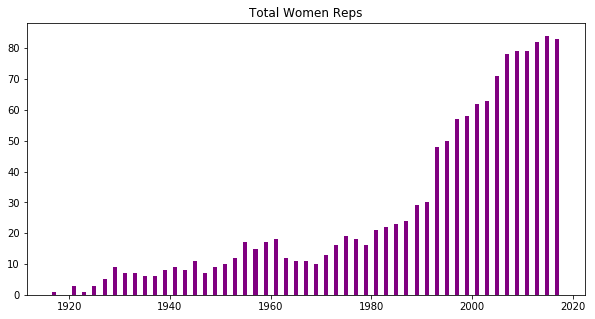

In [47]:
fig = plt.figure(figsize=[10, 5])
axs = fig.add_subplot(111)
axs.bar(x = df['StartYear'], height = df['Women total'], color = 'purple')
axs.set_title('Total Women Reps')

Text(0,0.5,'Number of reps')

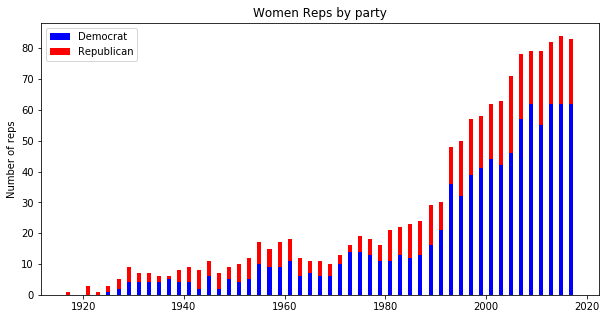

In [79]:
fig = plt.figure(figsize=[10, 5])
axs = fig.add_subplot(111)
p1 = axs.bar(x = df['StartYear'], height = df['Democratic'], color = 'blue')
p2 = axs.bar(x = df['StartYear'], height = df['Republican'], bottom = df['Democratic'], color = 'red')
axs.set_title('Women Reps by party')
plt.legend((p1[0], p2[0]), ('Democrat', 'Republican'))
plt.ylabel('Number of reps')

It looks like the share of female reps by party has stayed similar.  
There was a big jump in '93, which was the start of the Clinton era. The number of Democratic women jumped ~40%.

In [75]:
df['PercOfWomenDem'] = df['% of women (Dem)'].apply(lambda x: float(x[:-1]))

In [76]:
df['PercOfWomenRepub'] = df['% of women (Rep)'].apply(lambda x: float(x[:-1]))

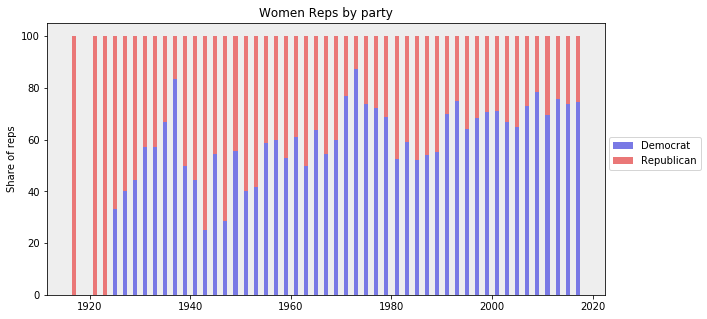

In [108]:
fig = plt.figure(figsize=[10, 5])
axs = fig.add_subplot(111)
p1 = axs.bar(x = df['StartYear'], height = df['PercOfWomenDem'], color = '#7979e5')
p2 = axs.bar(x = df['StartYear'], height = df['PercOfWomenRepub'], bottom = df['PercOfWomenDem'], color = '#ea7777')
axs.set_title('Women Reps by party')
plt.legend((p1[0], p2[0]), ('Democrat', 'Republican'), bbox_to_anchor=(1.18, .6))
plt.ylabel('Share of reps')
axs.set_facecolor('#eeeeee')

The number of female Democrat reps may have jumped in '93, but the shares of women changed more the previous cycle in '91.  
There looks like a trend towards a greater share in the Democratic party.

I think that comparing the parties like this is interesting but missing the forest for the trees.  
It is great that more women are getting elected, but the goal is equality.  
Try to compare the numbers to total parity.

In [9]:
df.columns

Index(['Congress', 'Years', 'Women total', 'Republican', '% of women (Rep)',
       '% of party (Rep)', 'Democratic', '% of women (Dem)',
       '% of party (Dem)'],
      dtype='object')